# **<center> Introduction to Python for Practical Problems </center>**
# **<center> New Economic School, MAE 2025 </center>**
## **<center> Section 6 </center>**

План:

    1. Чтение и запись файлов
        1.1. Файлы типа .txt
            1.1.1. Открытие файла в режиме чтения
            1.1.2. Открытие файла в режиме записи
            1.1.3. Открытие файла в режиме присоединения
            1.1.4. Открытие файла при помощи конструкции with open()
        1.2. Файлы типа .json
            1.2.1. Запись элементов в .json
            1.2.2. Чтение содержимого .json 
    2. Генераторы
    3. Статистика и библиотека SciPy
        3.1. Пример с нормальным распределением
            3.1.1. Функция плотности вероятности (PDF)
            3.1.2. Кумулятивная функция распределения (CDF)
            3.1.3. Доверительные интервалы
            3.1.4. Тест на нормальность распределения
            3.1.5. Другие тесты
    4. Оптимизация
    5. Получение данных с помощью Pandas из различных ресурсов
    6. Скрапинг данных (базово)
        6.1. Получение данных с сайта
        6.2. Выгрузка файлов с сайтов

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

import warnings
warnings.simplefilter("ignore")

# 1. Чтение и запись файлов

Для того, чтобы работать с текстовым файлом, требуется его открыть. Сделать это можно через встроенный метод `open()`, в котором надо прописать путь до файла (включая название и расширение файла). Данный метод вернет объект файла, который содержит в себе различные методы.

В Python файлы категоризованы на бинарные и текстовые, где текстовые представляют из себя последовательность строк (а каждая строка является псоедовательностью символов). Каждая строка заканчивается специальным символом перевода строки - `"\n"`. Бинарным файлом считается любой нетекстовый файл. 

Если с файлом проведены все операции, его можно закрыть, взяв от него мтеод `.close()`. Мотивацией может служить более оптимальное расходование ресурсов, а также желание избежать каких-либо непредусмотренных ошибок в дальнейшем.

Чтобы получить все содержимое файла (всю строку), нужно использовать метод `.read()` к открытому файлу. Повторное применение этого метода вернет пустую строку.

## 1.1. Файлы типа `.txt`

In [2]:
data = open('Section_6_Data.txt')

data.read()

'id;column_1;column_2;column_3;column_4;column_5\n1;4;Moscow;June;2019;257\n2;7;Moscow;June;2019;304\n3;5;Novgorod;July;2018;435\n10;9;Kazan;September;2020;270\n14;3;Saint Petersburg;November;2019;342'

In [3]:
data.read()

''

In [4]:
data.close()

Открывать файлы можно в режиме чтения (**r**), в режиме записи (**w**), в режиме чтения и записи (**r+**), а также в режиме добавления (**a**). В режиме добавления записи добавятся в конец содержимого файла.

### 1.1.1. Открытие файла в режиме чтения

При открытии файла в режиме чтения вы не сможете записать в него ничего. При прочтении файла в режиме записи вы, напротив, не сможете прочесть его содержимое.

In [5]:
data = open('Section_6_Data.txt', mode='r')

print(data.read())

id;column_1;column_2;column_3;column_4;column_5
1;4;Moscow;June;2019;257
2;7;Moscow;June;2019;304
3;5;Novgorod;July;2018;435
10;9;Kazan;September;2020;270
14;3;Saint Petersburg;November;2019;342


Файл мы открыли в режиме чтения. Запись в файл невозможна.

In [7]:
# data.write('something_new\n')

In [8]:
data.close()

В методе `.read()`, примененному к открытому файлу, можно указать аргументом число символов, которые хочется вывести. Пример ниже.

In [9]:
data = open('Section_6_Data.txt')

print(data.read(11))

data.close()

id;column_1


In [10]:
data = open('Section_6_Data.txt')

Метод `.readline()` позволяет считывать по строке/линии файла за 1 итерацию.

Данный метод при его вызове выдает следующую строчку. При вызове метода, когда содержимое файла исчерпано, будет возвращаться пустая строка.

In [11]:
for _ in range(3):
    print(data.readline())

id;column_1;column_2;column_3;column_4;column_5

1;4;Moscow;June;2019;257

2;7;Moscow;June;2019;304



In [12]:
data.close()

Чтобы прочесть все строки/линии сразу можно воспользоваться методом `.readlines`()

In [13]:
data = open('Section_6_Data.txt')

print(*data.readlines())

data.close()

id;column_1;column_2;column_3;column_4;column_5
 1;4;Moscow;June;2019;257
 2;7;Moscow;June;2019;304
 3;5;Novgorod;July;2018;435
 10;9;Kazan;September;2020;270
 14;3;Saint Petersburg;November;2019;342


Также можно итерироваться по строкам в цикле.

In [14]:
data = open('Section_6_Data.txt')

for line in data: 
    print(line)

data.close() 

id;column_1;column_2;column_3;column_4;column_5

1;4;Moscow;June;2019;257

2;7;Moscow;June;2019;304

3;5;Novgorod;July;2018;435

10;9;Kazan;September;2020;270

14;3;Saint Petersburg;November;2019;342


После закрытия файла уже нельзя будет работать с ним.

In [17]:
# for line in data: 
#     print(line)

### 1.1.2. Открытие файла в режиме записи

В файл также можно записывать строки через метод `.write()` (по 1-й строке за раз). Для этого откроем другой текстовый файл (который необязательно создавать заранее - запись в файл, который не существует, автоматически создаст его, файл будет пустым; подобный трюк не прокатит с режимом чтения)

In [18]:
data = open('Section_6_Data_New.txt', mode='w')

data.write("Something for line 1\n") 
data.write("Something for line 2\n")
data.write("Something for line 3\n") 

21

Файл открыт на запись, прочитать его не можем.

In [21]:
# data.read()

In [22]:
data.close() 

Прочтем и посмотрим, прошла ли запись

In [23]:
data = open('Section_6_Data_New.txt', mode='r')

print(data.read())

data.close()

Something for line 1
Something for line 2
Something for line 3



### 1.1.3. Открытие файла в режиме присоединения

Тепреь давайте присоединим еще 1 строку с помощью режиме присоединения (`mode = 'a'`)

In [24]:
data = open('Section_6_Data_New.txt', mode='a')

data.write("Something for line 4\n") 

data.close()

In [25]:
data = open('Section_6_Data_New.txt', mode='r')

print(data.read())

data.close()

Something for line 1
Something for line 2
Something for line 3
Something for line 4



Можно также в файл записывать несколько строк сразу через метод `.writelines()`, подав методу массив из строк.

In [26]:
data = open('Section_6_Data_New.txt', mode='a')

text_lines = ["Something for line 5\n", 
              "Something for line 6\n", 
              "Something for line 7\n"] 

data.writelines(text_lines) 

data.close() 

In [27]:
data = open('Section_6_Data_New.txt', mode='r')

print(data.read())

data.close()

Something for line 1
Something for line 2
Something for line 3
Something for line 4
Something for line 5
Something for line 6
Something for line 7



Метод записи же для этого файла перезапишет содержимое.

In [28]:
data = open('Section_6_Data_New.txt', mode='w')

data.write('Something for line 8\n')

data.close()

In [29]:
data = open('Section_6_Data_New.txt', mode='r')

print(data.read())

data.close()

Something for line 8



### 1.1.4. Открытие файла при помощи конструкции `with open()`

Также при работе с файлами можно использовать выражение `with`, которое в данном случае открывает файл, выполняет операции под своим блоком (код под блоком `with`) и автоматически закрывает файл. Таким образом, не надо прописывать закрытие файла. Вдобавок, можно считать это выражении при работе с файлами некой страховкой.

In [30]:
with open('Section_6_Data.txt', mode='r') as file:
    data = file.read()

In [31]:
print(data)

id;column_1;column_2;column_3;column_4;column_5
1;4;Moscow;June;2019;257
2;7;Moscow;June;2019;304
3;5;Novgorod;July;2018;435
10;9;Kazan;September;2020;270
14;3;Saint Petersburg;November;2019;342


In [32]:
with open('Section_6_Data.txt', mode='r') as file:
    for line in file:
        print(line)

id;column_1;column_2;column_3;column_4;column_5

1;4;Moscow;June;2019;257

2;7;Moscow;June;2019;304

3;5;Novgorod;July;2018;435

10;9;Kazan;September;2020;270

14;3;Saint Petersburg;November;2019;342


Т.к. файл автоматически закрывается, дальше работать с ним не получится

In [36]:
# file.read()

In [37]:
with open('Section_6_Data.txt', mode='r') as file:
    data = file.readlines()

In [38]:
data

['id;column_1;column_2;column_3;column_4;column_5\n',
 '1;4;Moscow;June;2019;257\n',
 '2;7;Moscow;June;2019;304\n',
 '3;5;Novgorod;July;2018;435\n',
 '10;9;Kazan;September;2020;270\n',
 '14;3;Saint Petersburg;November;2019;342']

Можно пройтись по строкам внутри списка и для каждой строки сделать список из ее элементов, убрав символ перевода строки и разбив строку на элементы с помощью методов `.rstrip()` и потом `.split(sep)`

In [39]:
text_lines = []

for i in data:
    text_lines.append(i.rstrip().split(';'))

text_lines

[['id', 'column_1', 'column_2', 'column_3', 'column_4', 'column_5'],
 ['1', '4', 'Moscow', 'June', '2019', '257'],
 ['2', '7', 'Moscow', 'June', '2019', '304'],
 ['3', '5', 'Novgorod', 'July', '2018', '435'],
 ['10', '9', 'Kazan', 'September', '2020', '270'],
 ['14', '3', 'Saint Petersburg', 'November', '2019', '342']]

Теперь удобно представить данные в виде датафрейма

In [40]:
df = pd.DataFrame(data = text_lines[1:], columns = text_lines[0])

df

,id,column_1,column_2,column_3,column_4,column_5
0,1,4,Moscow,June,2019,257
1,2,7,Moscow,June,2019,304
2,3,5,Novgorod,July,2018,435
3,10,9,Kazan,September,2020,270
4,14,3,Saint Petersburg,November,2019,342


Можем также проверять условия внутри файла

In [41]:
with open('Section_6_Data.txt', mode='r') as file:
    for line in file.readlines():
        if 'Moscow' not in line.rstrip().split(';'):
            print(line)

id;column_1;column_2;column_3;column_4;column_5

3;5;Novgorod;July;2018;435

10;9;Kazan;September;2020;270

14;3;Saint Petersburg;November;2019;342


## 1.2. Файлы типа `.json`

JSON -  один из наиболее часто встречаемых форматов данных. Подробнее о нем, и зачем он нужен можно прочесть [здесь](https://ru.wikipedia.org/wiki/JSON) и [здесь](https://qastack.ru/programming/383692/what-is-json-and-why-would-i-use-it)

Для работы с json-файлом, давайте сперва создадим его. Зададим словарь ниже

In [42]:
import json

In [43]:
obj = """
{"customer_id": "3",
 "place_of_living": "Canada",
 "degree": "masters",
 "majors": [{"name": "Industrial Organization", "n courses": 4, "GPA": 4.6},
              {"name": "Finance", "n courses": 7, "GPA": 4.9}]}
"""

### 1.2.1. Запись элементов в `.json`

Запишем содержимое в переменную с помощью метода `.loads()`

In [44]:
res = json.loads(obj)

res

{'customer_id': '3',
 'place_of_living': 'Canada',
 'degree': 'masters',
 'majors': [{'name': 'Industrial Organization', 'n courses': 4, 'GPA': 4.6},
  {'name': 'Finance', 'n courses': 7, 'GPA': 4.9}]}

Запишем содержимое в файл с помощью метода `.dump()`

In [45]:
with open('json_data.json', mode='w', encoding='utf-8') as file:
    json.dump(res, file)

### 1.2.2. Чтение содержимого `.json`

Проверим как прошла запись, прочитав файл с помощью метода `.load()`

In [46]:
with open('json_data.json') as file:
    data = json.load(file)

In [47]:
data

{'customer_id': '3',
 'place_of_living': 'Canada',
 'degree': 'masters',
 'majors': [{'name': 'Industrial Organization', 'n courses': 4, 'GPA': 4.6},
  {'name': 'Finance', 'n courses': 7, 'GPA': 4.9}]}

In [48]:
data.values()

dict_values(['3', 'Canada', 'masters', [{'name': 'Industrial Organization', 'n courses': 4, 'GPA': 4.6}, {'name': 'Finance', 'n courses': 7, 'GPA': 4.9}]])

# 2. Генераторы

Генератор - объект, который сразу же при его создании не делает каки-либо вычислений с его элементами. Генератор хранит в памяти только последний вчисленный элемент, а также правило перехода к следующему элементу + условие, при котором переход прерывается

Вычисление следующего значения происходит при вызове метода `next()` к объекту генератора.

Мотивация использования можем быть в более эконом расходовании ресурсов - файлы можно прочитывать и проводить операции кусками. А, возможно, поток данных непрерывен: котировки, показания приборов и т.д. Также генераторы можно использовать при желании и/или необходимости задать какую-то свою структуру.

Для создания генератора требуется задать функцию, также как мы делали и раньше. Однако вместо `return` будет стоять оператор `yield`. `yield` в отличие от `return` приостанавливает работу функцию, но не завершает.

При первом вызове `next()` к объекту генератора выполняется код функции с первой команды до `yield`. При втором и последующих вызовах `next()` выполняется код со следующей после `yield` команды.

Сделаем простой генератор-счетчик

In [49]:
def exhaust(number):
    a = 0
    while a < number:
        yield a
        a += 1

In [50]:
gen_1 = exhaust(10)

In [51]:
gen_1

<generator object exhaust at 0x0000026D541C0C70>

In [52]:
next(gen_1)

0

In [53]:
next(gen_1)

1

На 10-м вызове `next()` получим ошибку, т.к. итерировать больше нечего

In [54]:
next(gen_1)

2

Можно итерироваться по значениям генератора в списке. Это чем-то напоминает работу `range()`.

In [55]:
for i in exhaust(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


Однако, в отличие от `range()`, в свой генератор можно добавить различную специфику

In [56]:
def exhaust_mod(number):
    a = 0
    while a < number:
        if a % 2 == 0:
            yield a
        a += 1

In [57]:
for i in exhaust_mod(10):
    print(i)

0
2
4
6
8


А пример ниже позволяет читать данные построчно (хотя реализация его сыра и плоха, т.к. мы сразу читаем весь файл, а потом возвращаем по строчке)

In [58]:
def read_lines(data):
    while True:
        yield data.readline().rstrip()

In [59]:
data = open('Section_6_Data.txt', mode='r')

res = read_lines(data)

In [60]:
next(res)

'id;column_1;column_2;column_3;column_4;column_5'

In [61]:
data.close()

In [62]:
next(res)

ValueError: I/O operation on closed file.

# 3. Статистика и библиотека `SciPy`

<center> <img src="https://www.fullstackpython.com/img/logos/scipy.png" width=50%> </center>

`SciPy` - библиотека, предназначенная для различных научных, инженерных и прочих рассчетов. 

В библиотеке в модуле `stats` реализованы различные методы для работы со случайными величинами, их распределениями, а также для построения доверительных интервалов и тестирования статистических гипотез



In [63]:
import scipy.stats as sts

## 3.1. Пример с нормальным распределением

С помощью метода `.ppf()` (примененного к распределиню - в нашем случае `norm`) можно получить обратную функцию плотности распределения



In [64]:
sts.norm.ppf(0.95)

1.6448536269514722

В распределении также можно задать его параметры - для нормального среднее (`loc`) и стандартное отклонение (`scale`)

In [65]:
sts.norm.ppf(0.95, loc=1, scale=2)

4.289707253902945

### 3.1.1. Функция плотности вероятности (PDF)

Можно для случайных величин посчитать значения плотности распределиня с помощью метода `.pdf()`

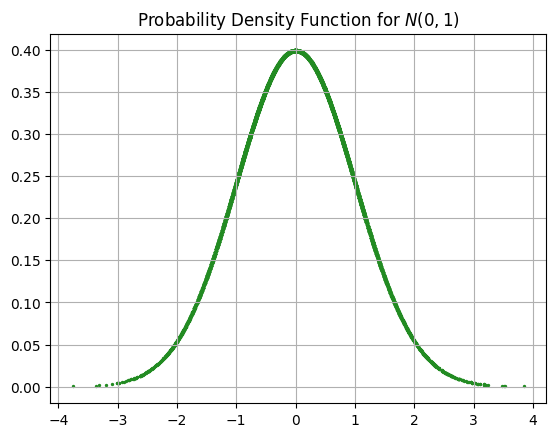

In [66]:
array_of_normals = np.random.normal(size=10000)
norm_pdf = sts.norm.pdf(array_of_normals)

plt.scatter(array_of_normals, norm_pdf, color='forestgreen', s=2)

plt.title('Probability Density Function for $N(0,1)$')
plt.grid()

None

### 3.1.2. Кумулятивная функция распределения (CDF)

Также можно посчитать значения функции распределения с помощью метода `.cdf()`

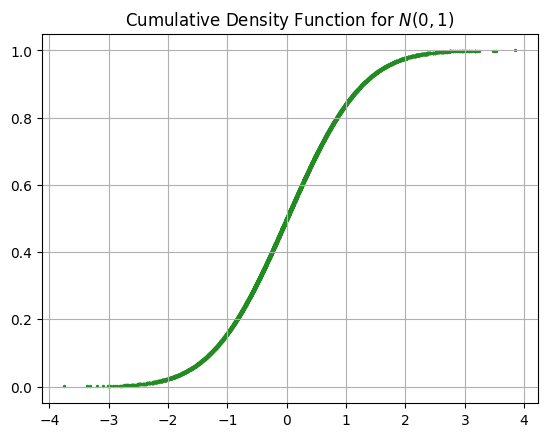

In [67]:
norm_cdf = sts.norm.cdf(array_of_normals)

plt.scatter(array_of_normals, norm_cdf, color='forestgreen', s=2)

plt.title('Cumulative Density Function for $N(0,1)$')
plt.grid()

None

### 3.1.3. Доверительные интервалы

Можно построить доверительный интервал для среднего своими руками.

In [68]:
def mean_confidence_interval(sample, confidence=0.95):

    n = len(sample)
    
    mu = np.mean(sample)
    se = np.std(sample) / np.sqrt(n)
    
    critical_value = sts.t.ppf((1+confidence)/2, n-1)

    lower = mu - se * critical_value
    upper = mu + se * critical_value

    return [lower, mu, upper]

Метод `.rvs()` у распределения позволяет сгенерировать случайную величину/величины.

Создадим выборку из 100 случайных величин из распределения Стьюдента с 3-мя степенями свободы.

In [69]:
sample_1 = sts.t.rvs(size=100, df=3)

# Наш метод
ci_interval_handmade = mean_confidence_interval(sample_1, confidence=0.95)

# Встроенный метод из SciPy
ci_interval_scipy = sts.t.interval(0.95, df=len(sample_1)-1, loc=np.mean(sample_1), scale=sts.sem(sample_1))

print(f'Hand-made Confidence Interval : ({ci_interval_handmade[0]:.4f}, {ci_interval_handmade[2]:.4f})')
print(f'Scipy-made Confidence Interval: ({ci_interval_scipy[0]:.4f}, {ci_interval_scipy[1]:.4f})')

Hand-made Confidence Interval : (-0.2761, 0.2346)
Scipy-made Confidence Interval: (-0.2774, 0.2359)


То же самое можно посчитать и для, например, нормального распределения.

In [70]:
sts.norm.interval(0.95, loc=np.mean(sample_1), scale=sts.sem(sample_1))

(-0.2742227860138742, 0.23279404525709316)

### 3.1.4. Тест на нормальность распределения

Визуально тест на нормальность распределения можно провести с помощью графика **QQ-plot**, у которого координаты (x, y) - это координаты, соответствующие определенному квантилю у теоретического и наблюдаемого/тестируемого распределений.

Подробнее [тут](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot)

In [71]:
sample_1 = sts.norm.rvs(loc=1, scale=2, size=1000)
sample_2 = sts.t.rvs(loc=1, scale=2, df=3, size=1000)

График можно создать с помощью метода `.probplot()`.

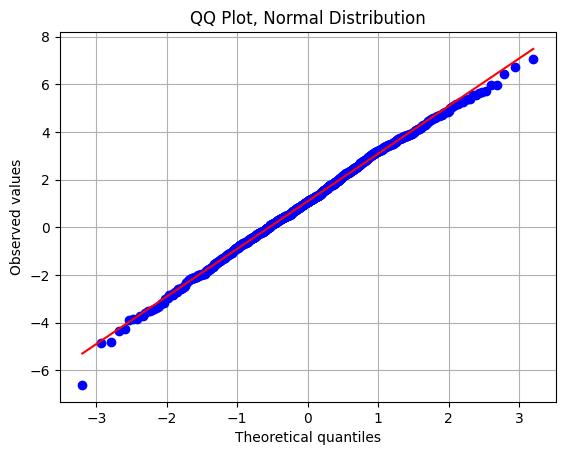

In [72]:
res = sts.probplot(sample_1, plot=plt)

plt.xlabel('Theoretical quantiles')
plt.ylabel('Observed values')

plt.title('QQ Plot, Normal Distribution')
plt.grid()

None

Для распределения Стьюдента видно, что крайние квантили далеки от нормального распределения, что довольно логично и ожидаемо

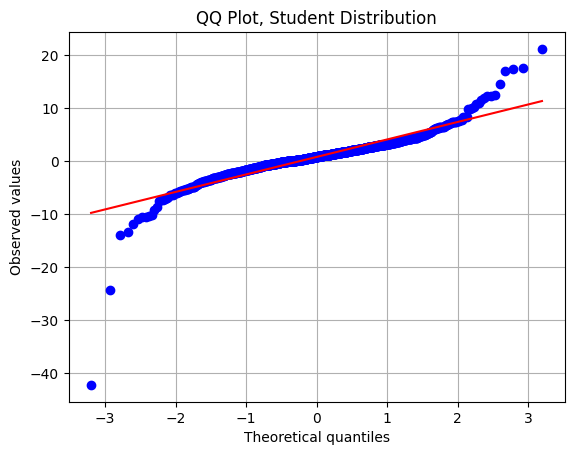

In [73]:
res = sts.probplot(sample_2, plot=plt)

plt.xlabel('Theoretical quantiles')
plt.ylabel('Observed values')

plt.title('QQ Plot, Student Distribution')
plt.grid()

None

В библиотеке также реализованы различные статистические тесты

Есть тесты на нормальность, есть тесты для средних и т.д. Подробнее можно прочитать [тут](https://docs.scipy.org/doc/scipy/reference/stats.html).

### [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) (normality test)

**H0**: the sample has a Gaussian distribution.

**H1**: the sample does not have a Gaussian distribution.

In [74]:
from scipy.stats import shapiro

test_statistics, p_value = shapiro(sample_2)

print(f'Test statistics is {test_statistics:.4f}, and it is {p_value < 0.05} that we can reject the null hypothesis')
print(f'P-value is {p_value}')

Test statistics is 0.8404, and it is True that we can reject the null hypothesis
P-value is 1.6399925837446396e-30


### [Anderson-Darling test](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test) (normality test)

**H0**: the sample has a Gaussian distribution.

**H1**: the sample does not have a Gaussian distribution.

In [75]:
from scipy.stats import anderson

result = anderson(sample_2)

result.fit_result

  params: FitParams(loc=0.8098202036941123, scale=3.6010366414940314)
 success: True
 message: '`anderson` successfully fit the distribution to the data.'

### 3.1.5. Другие тесты

### Correlation significance test

**H0**: $\rho = 0 $

**H1**: $ \rho \neq 0$

\begin{equation} t = \rho \times \frac{\sqrt{n-2}}{\sqrt{1-\rho^2}} \end{equation}

In [76]:
from scipy.stats import pearsonr

sample_1 = sts.norm.rvs(loc=2, scale=3, size=10000)
sample_2 = sample_1 * 0.3 + sts.norm.rvs(loc=0, scale=0.25, size=10000)

pearsonr(sample_1, sample_2)

PearsonRResult(statistic=0.9630393210724089, pvalue=0.0)

In [77]:
sample_1 = sts.norm.rvs(loc=2, scale=3, size=10000)
sample_2 = sts.norm.rvs(loc=0, scale=1, size=10000)

pearsonr(sample_1, sample_2)

PearsonRResult(statistic=-0.005053233048189389, pvalue=0.6133738728366424)

### [Dickey-Fuller test, Unit Root test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)

**H0**: a unit root is present (time series is non-stationary)

**H1**: a unit root is not present (time series is stationary)

In [78]:
from statsmodels.tsa.stattools import adfuller

point = sts.norm.rvs(loc=1, scale=3, size=1)
series = np.zeros(1000)
series[0] = point

for i in range(1, 1000):
    series[i] = 0.1 + 0.8 * series[i - 1] + sts.norm.rvs(loc = 0, scale = 0.25, size = 1)

adfuller(series)

(-12.302171993561139,
 7.407849113140203e-23,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 23.768025981829624)

**First data point**: -12.333608904986031: Critical value of the data

**Second data point**: 6.34540078124911e-23: Probability that null hypothesis will not be rejected(p-value)

**Third data point**: 3: Number of lags used in regression to determine t-statistic

**Forth data point**: 996: Number of observations used in the analysis.

**Fifth data point**: {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}: T-values corresponding to adfuller test.

Since critical value -12.3 < -2.5,-3.4,-2.8 (t-values at 1%, 5% and 10% confidence intervals), null hypothesis can be rejected. So, the data is statoinary

Also p-value of 6.35e-23 < 0.05(if we take 5% significance level or 95% confidence interval), null hypothesis can be rejected.

Hence, data is stationary (that means it has no relation with time)

# 4. Оптимизация

Также в **SciPy** реализован модуль **optimize** для оптимизации функций (доступна как условная, так и безусловная оптимизация). Подробнее про это можно прочитать [тут](https://docs.scipy.org/doc/scipy/reference/optimize.html).

Мы будем пользоваться методом `minimize` из этого модуля

In [79]:
from scipy.optimize import minimize

Напишем простенькую квадратичную функцию одной переменной

In [80]:
def function_1(x):
    return 3 * x ** 2 - 2 * x + 4

Отобразим ее

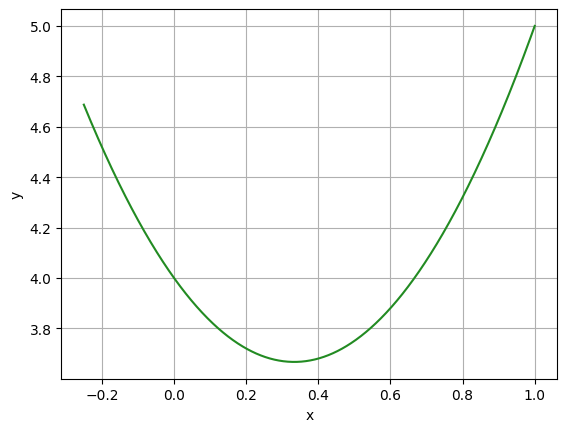

In [81]:
x = np.linspace(-0.25, 1, num=1000)
y = function_1(x)

plt.plot(x, y, color='forestgreen')

plt.xlabel('x')
plt.ylabel('y')

plt.grid()

None

Найдем минимум функции (напоминание - если требуется максимизировать функцию, то нужно минимизировать отрицательную функцию). Для этого в метод `minimize` передадим нашу функцию и изначальные значения для парамтера, по которому проводим оптимизацию, `x0`

In [82]:
res = minimize(function_1, x0=5)

res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.666666666666677
        x: [ 3.333e-01]
      nit: 3
      jac: [ 3.874e-07]
 hess_inv: [[ 1.667e-01]]
     nfev: 8
     njev: 4

In [83]:
function_1(0), function_1(0.3333)

(4, 3.66666667)

Также можно оптимизировать и функции, которые используют данные. Давайте оценим коэффициенты линейной однофакторной регрессии с помощью метода максимальнго правдоподобия.

Т.к. оптимизировать проще логарифм функции правдоподобия, то сразу приведу его:

\begin{equation} LL = -\frac{n}{2} \log{2\pi} - n \log{\sigma} - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - (\alpha + \beta x_i)^2)\end{equation}

Т.к. мы максимизируем логарифмическую функци правдоподобия, то минимизировать надо отрицательную функцию правдоподобия.

In [84]:
def norm_reg_loglik(coefs, y, x):

    alpha = coefs[0]
    beta = coefs[1]
    S = coefs[2]

    n = len(y)

    no_data_factor = -n / 2 * np.log(2 * np.pi) - n * np.log(S)
    data_factor = -1 / (2 * S ** 2) * sum((y - alpha - beta * x) ** 2)

    neg_loglik = -1 * (no_data_factor + data_factor) 
    
    return neg_loglik

Создадим данные

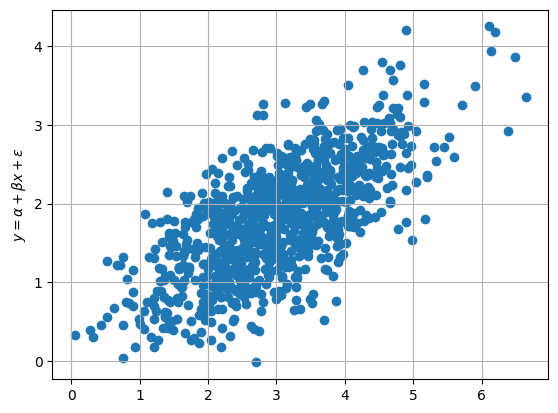

In [85]:
x = sts.norm.rvs(scale=1, loc=3, size=1000)
alpha, beta = 0.3, 0.5

y = alpha + beta * x + sts.norm.rvs(scale=0.5, loc=0, size=1000)

plt.scatter(x, y)

plt.ylabel(r'$y=\alpha + \beta x +\epsilon $')

plt.grid()

None

Проведем оптимизацию, в качестве метода будем использовать **slsqp**. Также доступны другие методы, про которые можно прочитать [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

In [86]:
res_reg = minimize(fun=norm_reg_loglik, x0=[0.1, 0.1, 0.2], args=(y,x), method='slsqp')

res_reg

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 734.0235663082489
       x: [ 3.512e-01  4.834e-01  5.041e-01]
     nit: 46
     jac: [ 2.823e-04  1.991e-03  1.183e-03]
    nfev: 240
    njev: 46

Посмотрим на качество подгонки

In [87]:
alpha_hat = res_reg['x'][0]
beta_hat = res_reg['x'][1]

y_hat = alpha_hat + beta_hat * x

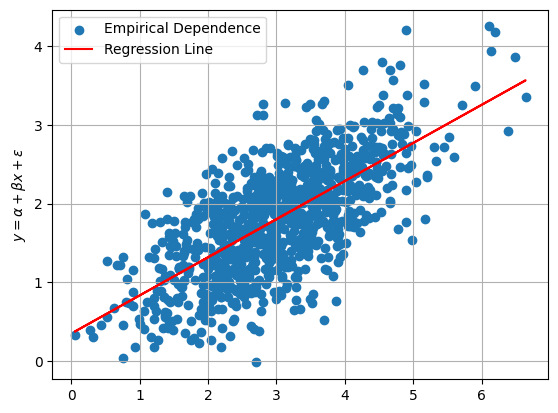

In [88]:
plt.scatter(x, y, label='Empirical Dependence')
plt.plot(x, y_hat, label='Regression Line', color='r')

plt.ylabel(r'$y=\alpha + \beta x +\epsilon $')

plt.legend()

plt.grid()

None

Теперь давайте попрактикуемся с оптимизацией с ограничениями

Допустим, у нас есть следующая функция полезности, которые ограничена бюджетом. Также мы не можем продавать товары.

\begin{equation} U(x_1, x_2) = s_1 \times x_1 + s_{21} \times x_2 + s_{22} \times x_2^2  \end{equation}

\begin{equation} x_1 \times p_1 + x_2 \times p_2 \leq M \end{equation}

\begin{equation} x_1 \geq 0 \end{equation}
\begin{equation} x_2 \geq 0 \end{equation}

Определим в коде функцию полезности

In [89]:
def utility_function(quantities, sensitivities):
    
    q1, q2 = quantities[0], quantities[1]
    s1, s21, s22 = sensitivities[0], sensitivities[1], sensitivities[2]
    
    return -1 * (s1 * q1 + s21 * q2 + s22 * (q2 ** 2))

Определим бюджетное ограничение

In [90]:
def budget_constraint(quantities):
    
    q1, q2 = quantities[0], quantities[1]
    
    return -1 * (q1 * 5 + q2 * 10 - 100)

В массив cons передадим ограничения. Каждое ограничение представляет из себя словарь с ключами типа и функции. Тип может быть `eq` (equality) и `ineq` (inequality)

Ограничения по самим переменным можно задать массивом bnds, в которых передать границы. Если какой-либо из границ нет, то передается `None`

In [91]:
sensitivities = [1.5, 2.5, -1.25]

cons = ({'type': 'ineq', 
         'fun': budget_constraint})

bnds = ((0, None), (0, None))

In [92]:
res_util = minimize(utility_function, 
                    x0=[1,1], 
                    args=(sensitivities), 
                    constraints=cons, 
                    method='slsqp')

res_util

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -30.049999999997368
       x: [ 2.040e+01 -2.000e-01]
     nit: 6
     jac: [-1.500e+00 -3.000e+00]
    nfev: 18
    njev: 6

Видим, что оптимальное число второго товара отрицательно. Давайте добавим ограничения по переменным в `bounds`

In [93]:
res_util = minimize(utility_function, 
                    x0=[1,1], 
                    args=(sensitivities), 
                    constraints=cons, 
                    method='slsqp', 
                    bounds=bnds)
res_util

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -29.999999999999968
       x: [ 2.000e+01  0.000e+00]
     nit: 4
     jac: [-1.500e+00 -2.500e+00]
    nfev: 12
    njev: 4

# 5. Получение данных с помощью Pandas из различных ресурсов

Мы уже доставали данные по котировкам акций с Yahoo-Finance. Теперь попробуем достать данные из других ресурсов при помощи `pandas`.

С помощью библиотеки **pandas_datareader** можно подгружать различные данные (финансовые и экономические, как правило)

Подробнее - [здесь](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-wb)

In [94]:
# pip install pandas_datareader

In [97]:
import pandas_datareader as pdr
import pandas_datareader.data as web
from datetime import datetime as dt

# from API_KEYS import AV_API_KEY # Здесь хранится api для доступа к данным с AV

In [99]:
# result = web.DataReader("AAPL", 
#                         "av-daily", 
#                         start=dt(2020, 1, 1), 
#                         end=dt(2024, 4, 7),
#                         api_key=AV_API_KEY)

# result

Можно поискать, есть ли информация, содержащая следующие вещи

In [100]:
from pandas_datareader import wb

results = wb.search('gdp.*capita.*const')

results

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10983,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10985,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10987,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10988,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


Скачаем данные по ВВП на душу населения России, США и Канады.

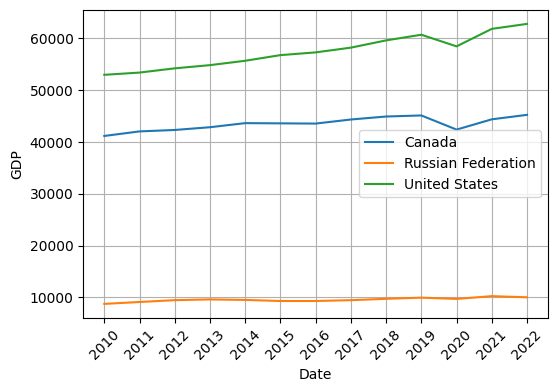

In [101]:
gdp = wb.download(indicator='NY.GDP.PCAP.KD', 
                  country=['US', 'CA', 'RU'], 
                  start=2010, 
                  end=2024)

gdp.reset_index(inplace=True)
gdp.sort_values(['country', 'year'], inplace=True)

countries = gdp['country'].unique()

plt.figure(figsize=(6,4))

for country in countries:
    
    plt.plot(gdp[gdp['country']==country]['year'], gdp[gdp['country']==country]['NY.GDP.PCAP.KD'], label=country)
    
plt.xlabel('Date')
plt.ylabel('GDP')

plt.xticks(rotation=45)
    
plt.legend()

plt.grid()

None

Часть ресурсов требует наличия **API** ключа. Как правило, ключ можно получить в личном кабинете этого ресурс после регистрации. Возможно, за некоторые **API** или их расширенный функционал нужно платить.

# 6. Скрапинг данных (базово)

Для скрапинга данных используются различные библиотеки. Базовыми являются **requests**, с помощью которой делается запрос к странице/сайту, и **urllib**.

Для парсинга полученного кода страницы с помощью запроса можно пользоваться библиотекой **bs4**, а именно модулем **BeautifulSoup**.

## 6.1. Получение данных с сайта

Мы будем скрапить [следующую страницу](http://www.cbr.ru/statistics/avgprocstav/?UniDbQuery.Posted=True&UniDbQuery.From=1.01.2020&UniDbQuery.To=3.03.2024)

In [102]:
from bs4 import BeautifulSoup
from requests import get
import urllib

import time

import datetime
from dateutil.relativedelta import relativedelta

В url'e сами укажем дату, с которой вытащить значения и даты, по которую вытаскивать. Применим метод `get` к данному url.

In [103]:
end_year = time.localtime()[0]
end_month = str(time.localtime()[1]-1)
    
start_year = 2020
start_month = str(1)

url = 'https://www.cbr.ru/statistics/avgprocstav/?UniDbQuery.Posted=True&UniDbQuery.From=1.'
url = url + start_month + '.' + str(start_year) + '&UniDbQuery.To=3.' + end_month + '.' + str(end_year)

response = get(url)

Получили какую-то HTML'ную кашу. Но если ее развернуть можно увидеть нужные нам данные по ставкам. Также известно, что HTML все же имеет свою структуру, из которой можно выцепить ту часть, которая нам нужна

In [104]:
response.text

'\r\n<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    \r\n\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n<meta name="format-detection" content="telephone=no" />\r\n<meta name="zoom:lang" content="ru" />\r\n    <meta name="zoom:last-modified" content="Fri, 03 May 2024 13:00:12 GMT" />\r\n<title>Динамика максимальной процентной ставки (по вкладам в российских рублях) десяти кредитных организаций, привлекающих наибольший объём депозитов физических лиц | Банк России</title>\r\n\r\n\r\n\r\n    <meta property="og:image" content="/common/images/share-1.jpg" />\r\n\r\n    \r\n\r\n\r\n            <link rel="stylesheet" type="text/css" href="/common/libs/jquery-ui/jquery-ui.min.css?v=v478607061" media="all">\r\n\r\n            <!--[if IE 9]><link rel="stylesheet" type="text/css" href="/common/style/main-ie9.css?v=v3286

Воспользуемся методом `BeautifulSoup`, передав в него код (текст) страницы и указав вид парсера

In [105]:
soup = BeautifulSoup(response.text, 'html.parser')

Получили уже что-то более структурированное

In [106]:
soup


<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="telephone=no" name="format-detection">
<meta content="ru" name="zoom:lang">
<meta content="Fri, 03 May 2024 13:00:12 GMT" name="zoom:last-modified"/>
<title>Динамика максимальной процентной ставки (по вкладам в российских рублях) десяти кредитных организаций, привлекающих наибольший объём депозитов физических лиц | Банк России</title>
<meta content="/common/images/share-1.jpg" property="og:image"/>
<link href="/common/libs/jquery-ui/jquery-ui.min.css?v=v478607061" media="all" rel="stylesheet" type="text/css"/>
<!--[if IE 9]><link rel="stylesheet" type="text/css" href="/common/style/main-ie9.css?v=v3286523716" media="all"><![endif]-->
<!--[if gt IE 9]><!--><link href="/common/style/main.min.css?v=v3286523716" media="all" re

Можно открыть код страницы и при наведении на него будет подсвечиваться тот участок страницы, на который мы наводим в ее коде.

Можно увидеть, что нужные нам данные находятся в **table-wrapper** части

In [107]:
soup.find_all('div', class_='table-wrapper')[0]

<div class="table-wrapper">
<div class="table">
<table class="data">
<tr>
<th>Декада</th>
<th>Ставка, %</th>
</tr>
<tr>
<td>III.04.2024</td>
<td>14,9220</td>
</tr>
<tr>
<td>II.04.2024</td>
<td>14,8320</td>
</tr>
<tr>
<td>I.04.2024</td>
<td>14,8320</td>
</tr>
<tr>
<td>III.03.2024</td>
<td>14,8320</td>
</tr>
<tr>
<td>II.03.2024</td>
<td>14,7020</td>
</tr>
<tr>
<td>I.03.2024</td>
<td>14,8470</td>
</tr>
<tr>
<td>III.02.2024</td>
<td>14,7890</td>
</tr>
<tr>
<td>II.02.2024</td>
<td>14,8590</td>
</tr>
<tr>
<td>I.02.2024</td>
<td>14,8300</td>
</tr>
<tr>
<td>III.01.2024</td>
<td>14,8800</td>
</tr>
<tr>
<td>II.01.2024</td>
<td>14,8700</td>
</tr>
<tr>
<td>I.01.2024</td>
<td>14,7930</td>
</tr>
<tr>
<td>III.12.2023</td>
<td>14,7530</td>
</tr>
<tr>
<td>II.12.2023</td>
<td>14,5220</td>
</tr>
<tr>
<td>I.12.2023</td>
<td>14,0030</td>
</tr>
<tr>
<td>III.11.2023</td>
<td>13,6370</td>
</tr>
<tr>
<td>II.11.2023</td>
<td>13,6370</td>
</tr>
<tr>
<td>I.11.2023</td>
<td>13,5670</td>
</tr>
<tr>
<td>III.10.2023<

Давайте запишем и используем метод `.find_all()` к данным

In [108]:
rates_table = soup.find_all('div', class_='table-wrapper')[0]
    
rates_n_dates = rates_table.find_all('td')

С данными ниже дальше будем проводить цикл для окончательной сборки

In [109]:
rates_n_dates

[<td>III.04.2024</td>,
 <td>14,9220</td>,
 <td>II.04.2024</td>,
 <td>14,8320</td>,
 <td>I.04.2024</td>,
 <td>14,8320</td>,
 <td>III.03.2024</td>,
 <td>14,8320</td>,
 <td>II.03.2024</td>,
 <td>14,7020</td>,
 <td>I.03.2024</td>,
 <td>14,8470</td>,
 <td>III.02.2024</td>,
 <td>14,7890</td>,
 <td>II.02.2024</td>,
 <td>14,8590</td>,
 <td>I.02.2024</td>,
 <td>14,8300</td>,
 <td>III.01.2024</td>,
 <td>14,8800</td>,
 <td>II.01.2024</td>,
 <td>14,8700</td>,
 <td>I.01.2024</td>,
 <td>14,7930</td>,
 <td>III.12.2023</td>,
 <td>14,7530</td>,
 <td>II.12.2023</td>,
 <td>14,5220</td>,
 <td>I.12.2023</td>,
 <td>14,0030</td>,
 <td>III.11.2023</td>,
 <td>13,6370</td>,
 <td>II.11.2023</td>,
 <td>13,6370</td>,
 <td>I.11.2023</td>,
 <td>13,5670</td>,
 <td>III.10.2023</td>,
 <td>12,0360</td>,
 <td>II.10.2023</td>,
 <td>11,4360</td>,
 <td>I.10.2023</td>,
 <td>10,1800</td>,
 <td>III.09.2023</td>,
 <td>10,1890</td>,
 <td>II.09.2023</td>,
 <td>9,7700</td>,
 <td>I.09.2023</td>,
 <td>9,6960</td>,
 <td>III.08.2023</

In [110]:
dates = []
rates = []
    
for i, j in enumerate(rates_n_dates):
    if i%2 == 0:
        dates.append(j.text)
    else:
        rates.append(j.text)
            
rates = list(map(lambda x: float(x.replace(',', '.')), rates))
            
rates_table = pd.DataFrame({'Date': dates, 'Rate': rates})

Получили красивую и удобную табличку с данными

In [111]:
rates_table

,Date,Rate
0,III.04.2024,14.922
1,II.04.2024,14.832
2,I.04.2024,14.832
3,III.03.2024,14.832
4,II.03.2024,14.702
...,...,...
62,I.08.2022,6.825
63,III.07.2022,6.925
64,II.07.2022,7.645
65,I.07.2022,7.645


Объединим все в 1 функцию

In [112]:
def retrieve_top10_max_deposit_rates(start_year, start_month, save=False):
    
    """Returns (parse) the data on maximum deposit rates across top 10 (by assets) banks from CBR.
    
    Keyword arguments:
    start_year -- a year to begin collecting data from (can be either int or str)
    start_month -- a month to begin collection data from (can be either int or str; values - from 1 to 12)
    -----------------------------------------------------
    One needs to turn off VPN to succeed with the request
    """
    
    if start_month > 12 or start_month < 1:
        raise ValueError('Start month should be between 1 and 12')
    
    end_year = time.localtime()[0]
    end_month = str(time.localtime()[1] - 1)
    
    start_month = str(start_month)
    
    if len(start_month) == 1:
        start_month = str(0) + start_month
    
    if len(end_month) == 1:
        end_month = str(0) + end_month
        
    url = 'https://www.cbr.ru/statistics/avgprocstav/?UniDbQuery.Posted=True&UniDbQuery.From=1.'
    url = url + start_month + '.' + str(start_year) + '&UniDbQuery.To=3.' + end_month + '.' + str(end_year)
    
    response = get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    rates_table = soup.find_all('div', class_ = 'table-wrapper')[0]
    
    rates_n_dates = rates_table.find_all('td')
    
    dates = []
    rates = []
    
    for i, j in enumerate(rates_n_dates):
        
        if i%2 == 0:
            dates.append(j.text)
        else:
            rates.append(j.text)
            
    rates = list(map(lambda x: float(x.replace(',', '.')), rates))
            
    rates_table = pd.DataFrame({'Date': dates, 'Rate': rates})
    
    if save:
        print('Type the path to the file with its name')
        rates_table.to_csv(str(input()) + '.csv')
    
    return rates_table

In [113]:
start_year = 2020
start_month = 1

retrieve_top10_max_deposit_rates(start_year, start_month, save = False)

,Date,Rate
0,III.04.2024,14.922
1,II.04.2024,14.832
2,I.04.2024,14.832
3,III.03.2024,14.832
4,II.03.2024,14.702
...,...,...
151,II.02.2020,5.447
152,I.02.2020,5.489
153,III.01.2020,5.757
154,II.01.2020,5.887


## 6.2. Выгрузка файлов с сайтов

С помощью библиотеки **urlllib** и метода `urlretrieve()` в `.request` можно также выгружать файлы с сайтов (не залезая на сайт и прожимая кнопочки)

Указать требутеся url до файла для скачивания (ссылка, по которой файл скачивается) и путь, куда сохранить файл

In [114]:
gks_gdp_path = 'https://rosstat.gov.ru/storage/mediabank/VVP_god_s_1995-2023.xlsx'
gks_gdp_store_path = 'GKS_GDP.xlsx'

urllib.request.urlretrieve(gks_gdp_path, gks_gdp_store_path)

('GKS_GDP.xlsx', <http.client.HTTPMessage at 0x26d7a5b8710>)

In [115]:
gks_gdp = pd.read_excel('GKS_GDP.xlsx', sheet_name='6')

Данные действительно загрузили, однако их еще нужно обработать (ручками - однако, если структура файла не меняется, то можно каждый месяц повторять один и тот же скрипт)

In [116]:
gks_gdp

,К содержанию,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Валовой внутренний продукт1) \n( в ценах 2021г...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.00000,2018.000000,2019.000000,2020.000000,2021.00000,20222),20232)
2,117583.90532,122315.582977,124462.737812,125379.116154,122905.738223,123143.771156,125393.24492,128912.206739,131745.794647,128249.716443,135773.76902,134080.634393,138973.636977
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1) Данные содержат изменения, связанные с внед...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2) Без учета статистической информации по Доне...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
gks_gdp = pd.read_excel('GKS_GDP.xlsx', sheet_name='6')

gks_gdp = gks_gdp.T.loc[:,1:2].rename(columns={1: 'year', 2: 'gdp'})

gks_gdp['year'] = [str(y)[:4] for y in gks_gdp['year'].values]
gks_gdp['year'] = pd.to_datetime(gks_gdp['year']).dt.year

gks_gdp.set_index('year', inplace=True)

gks_gdp

,gdp
year,
2011,117583.90532
2012,122315.582977
2013,124462.737812
2014,125379.116154
2015,122905.738223
2016,123143.771156
2017,125393.24492
2018,128912.206739
2019,131745.794647


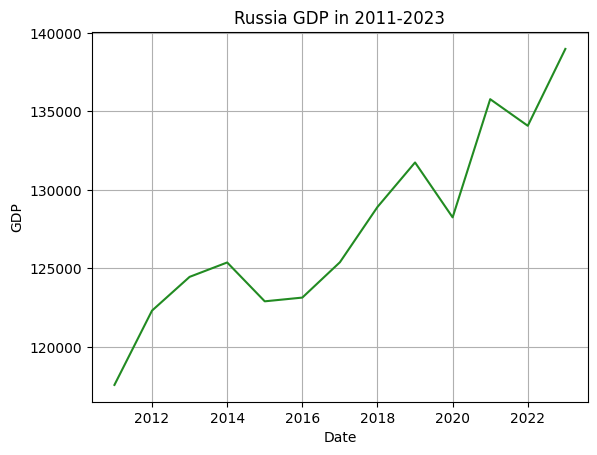

In [118]:
plt.plot(gks_gdp['gdp'], color='forestgreen')

plt.xlabel('Date')
plt.ylabel('GDP')

plt.title('Russia GDP in 2011-2023')

plt.grid()

None